In [44]:
import os

import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC

In [79]:
def blue_percentage(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv_l = np.array([100, 150, 0])
    hsv_h = np.array([140, 255, 255])
    return cv2.inRange(hsv, hsv_l, hsv_h).sum() / (img.shape[0] * img.shape[1])

In [80]:
DATASET_DIR = os.path.join('..', 'data')
TRAIN_DIR = os.path.join(DATASET_DIR, 'train')
TEST_DIR = os.path.join(DATASET_DIR, 'validation')

**Original dataset**

In [81]:
load_images = lambda paths: [np.array(Image.open(path)) for path in paths]

In [82]:
def load_dataset(data_path):
    positive_images = os.listdir(os.path.join(data_path, 'pools'))
    positive_images = [os.path.join(data_path, 'pools', image) for image in positive_images]
    positive_images = load_images(positive_images)

    negative_images = os.listdir(os.path.join(data_path, 'no_pools'))
    negative_images = [os.path.join(data_path, 'no_pools', image) for image in negative_images]
    negative_images = load_images(negative_images)
    
    return positive_images, negative_images

## **Main dataset**

In [83]:
train_positive_images, train_negative_images = load_dataset(TRAIN_DIR)
test_positive_images, test_negative_images = load_dataset(TEST_DIR)

In [84]:
def test_with_svm(train_positive_images, train_negative_images, test_positive_images, test_negative_images, feature_extraction_function):
    X = np.array(train_positive_images + train_negative_images)
    y = np.array([1] * len(train_positive_images) + [0] * len(train_negative_images))
    
    X = np.array([feature_extraction_function(img) for img in X]).reshape(-1, 1)
    
    clf = SVC()
    clf.fit(X, y)
    
    X_test = np.array(test_positive_images + test_negative_images)
    y_test = np.array([1] * len(test_positive_images) + [0] * len(test_negative_images))
    y_pred = clf.predict(np.array([feature_extraction_function(img) for img in X_test]).reshape(-1, 1))
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative', 'positive'])
    disp.plot()
    plt.show()

              precision    recall  f1-score   support

           0       0.71      0.62      0.67       176
           1       0.67      0.75      0.71       179

    accuracy                           0.69       355
   macro avg       0.69      0.69      0.69       355
weighted avg       0.69      0.69      0.69       355



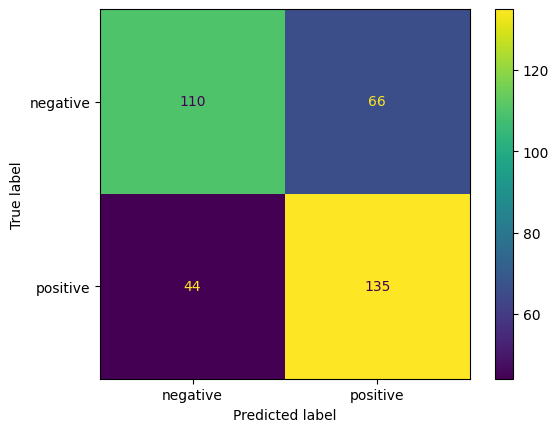

In [85]:
test_with_svm(train_positive_images, train_negative_images, test_positive_images, test_negative_images, blue_percentage)

## **Algarves dataset**

In [86]:
ALGARVES_DATASET = os.path.join(DATASET_DIR, 'datasets', 'algarves', 'formatted_dataset')

In [87]:
algarves_positive_images, algarves_negative_images = load_dataset(ALGARVES_DATASET)

C:\Users\Alexis\AppData\Local\Temp\ipykernel_9428\381011159.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test = np.array(test_positive_images + test_negative_images)


              precision    recall  f1-score   support

           0       0.39      0.34      0.36       117
           1       0.59      0.63      0.61       172

    accuracy                           0.52       289
   macro avg       0.49      0.49      0.49       289
weighted avg       0.51      0.52      0.51       289



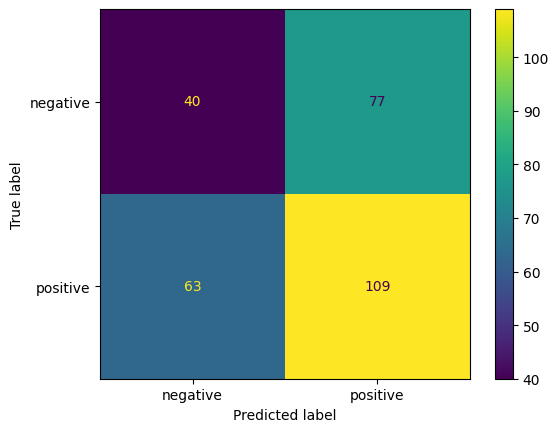

In [88]:
test_with_svm(train_positive_images, train_negative_images, algarves_positive_images, algarves_negative_images, blue_percentage)

## **Algarves fragmented dataset**

In [89]:
ALGARVES_DATASET = os.path.join(DATASET_DIR, 'datasets', 'algarves', 'fragmented_dataset')

In [90]:
algarves_positive_images, algarves_negative_images = load_dataset(ALGARVES_DATASET)

              precision    recall  f1-score   support

           0       0.83      0.69      0.75      1847
           1       0.14      0.26      0.18       352

    accuracy                           0.62      2199
   macro avg       0.48      0.47      0.46      2199
weighted avg       0.72      0.62      0.66      2199



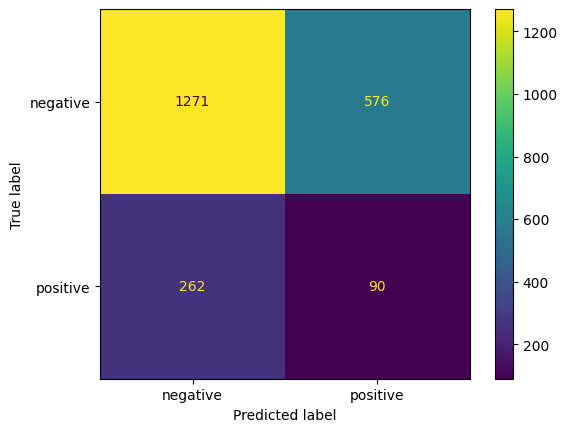

In [91]:
test_with_svm(train_positive_images, train_negative_images, algarves_positive_images, algarves_negative_images, blue_percentage)